In [1]:
import tensorflow as tf
#for gpu in tf.config.list_physical_devices("GPU")

In [2]:
#pip install tensorflow

In [5]:
#sess =  tf.compat.v1.Session(config=tf.ConfigProto(log_device_placement=True))

In [4]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10293445347507871525
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10116333568
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5637935497078698528
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:15:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [6]:
import tensorflow as tf
print("Num of GPUs available: ", len(tf.test.gpu_device_name()))

Num of GPUs available:  13


In [7]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [8]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):    
        if (image_name.split('.')[1] == 'npy'):
            
            image = np.load(img_dir+image_name)
                      
            images.append(image)
    images = np.array(images)
    
    return(images)


In [9]:
def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)
                       
            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples     

            batch_start += batch_size   
            batch_end += batch_size

In [11]:
#def testLoader(img_dir, img_list, batch_size):

    #L = len(img_list)

    #keras needs the generator infinite, so we will use while true  
    #while True:

        #batch_start = 0
        #batch_end = batch_size

        #while batch_start < L:
            #limit = min(batch_end, L)
                       
            #X = load_img(img_dir, img_list[batch_start:limit])
            #Y = load_img(mask_dir, mask_list[batch_start:limit])

            #yield (X,Y) #a tuple with two numpy arrays with batch_size samples     
            #yield(X)
            #batch_start += batch_size   
            #batch_end += batch_size

In [11]:
from matplotlib import pyplot as plt
import random

train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"
train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

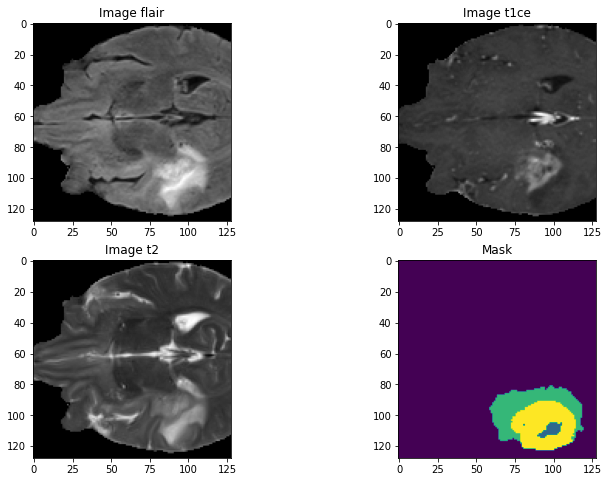

In [13]:
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [14]:
# @author: Sreenivas Bhattiprolu
# Code to train batches of cropped BraTS 2020 images using 3D U-net.

In [15]:
import keras

In [16]:
import os
import numpy as np
#from custom_datagen import imageLoader
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random


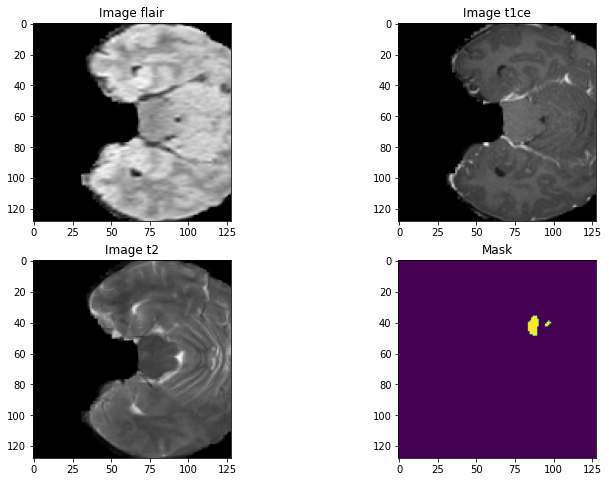

In [21]:
train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"

img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [30]:
import pandas as pd
columns = ['0','1', '2', '3']
df = pd.DataFrame(columns=columns)
train_mask_list = sorted(glob.glob('/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/*.npy'))
for img in range(len(train_mask_list)):
    #print(img)
    temp_image=np.load(train_mask_list[img])
    temp_image = np.argmax(temp_image, axis=3)
    val, counts = np.unique(temp_image, return_counts=True)
    zipped = zip(columns, counts)
    conts_dict = dict(zipped)
    
    df = df.append(conts_dict, ignore_index=True)
    #pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)],ignore_index=True)
    #df = pd.concat(conts_dict, ignore_index=True)

label_0 = df['0'].sum()
label_1 = df['1'].sum()
label_2 = df['1'].sum()
label_3 = df['3'].sum()
total_labels = label_0 + label_1 + label_2 + label_3
n_classes = 4

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(conts_dict, ignore_index=True)
<ipython-input-30-4ca605e48a96>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future

In [31]:
wt0 = round((total_labels/(n_classes*label_0)), 2) #round to 2 decimals
wt1 = round((total_labels/(n_classes*label_1)), 2)
wt2 = round((total_labels/(n_classes*label_2)), 2)
wt3 = round((total_labels/(n_classes*label_3)), 2)

In [32]:
print(wt0, wt1, wt2, wt3)

0.26 22.53 22.53 26.21


In [33]:
train_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/images/"
train_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/train/masks/"

val_img_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/val/images/"
val_mask_dir = "/home/passion/Documents/dockerfiles/brats_split_75-25/val/masks/"

train_img_list=os.listdir(train_img_dir)
train_mask_list = os.listdir(train_mask_dir)

val_img_list=os.listdir(val_img_dir)
val_mask_list = os.listdir(val_mask_dir)

In [34]:
batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list, 
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,val_mask_dir, val_mask_list,  batch_size)

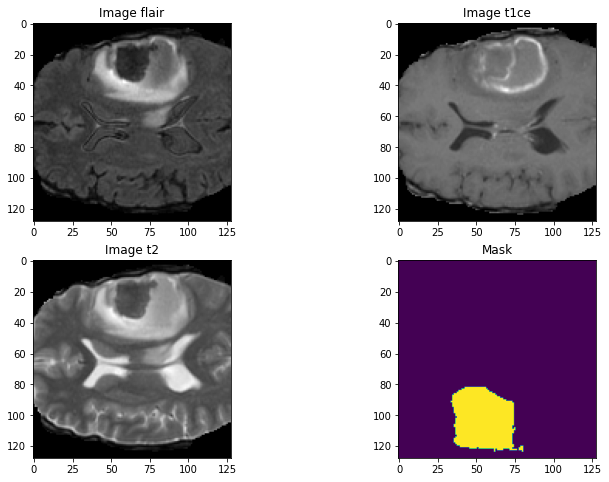

In [39]:
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [40]:
test_img.shape

(128, 128, 128, 3)

In [41]:
import keras

In [42]:
#!pip3 install -U segmentation-models-3D

In [44]:
#keras_applications.__version__
#keras_preprocessing.__version__


In [46]:
import tensorflow as tf
#from tensorflow import keras
#import tensorflow.keras.backend
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [48]:
from tensorflow import keras
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
from tensorflow.keras.optimizers import Adam
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3])) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
#optim = keras.optimizers.Adam(LR)
optim = Adam(learning_rate=0.001, decay=1e-6)

Segmentation Models: using `tf.keras` framework.


In [49]:
import sys
sys.executable

'/usr/bin/python3'

In [50]:
import tensorflow as tf
from tensorflow import keras 

In [51]:
#pip install tf-nightly

In [52]:
from tensorflow.keras.models import Sequential
from keras.models import Sequential
tf.compat.v1.enable_eager_execution()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [53]:
from keras.models import Model
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
#from keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' 

In [54]:
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)
    
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)
     
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)
     
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)
     
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible. 
    model.summary()
    
    return model

In [55]:
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

                                                                                                  
 conv3d_12 (Conv3D)             (None, 32, 32, 32,   221248      ['concatenate_1[0][0]']          
                                64)                                                               
                                                                                                  
 dropout_6 (Dropout)            (None, 32, 32, 32,   0           ['conv3d_12[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_13 (Conv3D)             (None, 32, 32, 32,   110656      ['dropout_6[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_tr

In [56]:
steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


#from  simple_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=128, 
                          IMG_WIDTH=128, 
                          IMG_DEPTH=128, 
                          IMG_CHANNELS=3, 
                          num_classes=4)

model.compile(optimizer = 'adam', loss=total_loss, metrics=metrics)
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

                                                                                                  
 conv3d_31 (Conv3D)             (None, 32, 32, 32,   221248      ['concatenate_5[0][0]']          
                                64)                                                               
                                                                                                  
 dropout_15 (Dropout)           (None, 32, 32, 32,   0           ['conv3d_31[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_32 (Conv3D)             (None, 32, 32, 32,   110656      ['dropout_15[0][0]']             
                                64)                                                               
                                                                                                  
 conv3d_tr

                                64)                                                               
                                                                                                  
 max_pooling3d_6 (MaxPooling3D)  (None, 16, 16, 16,   0          ['conv3d_24[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_25 (Conv3D)             (None, 16, 16, 16,   221312      ['max_pooling3d_6[0][0]']        
                                128)                                                              
                                                                                                  
 dropout_12 (Dropout)           (None, 16, 16, 16,   0           ['conv3d_25[0][0]']              
                                128)                                                              
          

 conv3d_36 (Conv3D)             (None, 128, 128, 12  6928        ['dropout_17[0][0]']             
                                8, 16)                                                            
                                                                                                  
 conv3d_37 (Conv3D)             (None, 128, 128, 12  68          ['conv3d_36[0][0]']              
                                8, 4)                                                             
                                                                                                  
Total params: 5,645,828
Trainable params: 5,645,828
Non-trainable params: 0
__________________________________________________________________________________________________
None


In [57]:
#model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
model.compile(optimizer= 'adam' , loss= total_loss, metrics=metrics)

In [58]:
history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )


Epoch 1/100
258/258 [==============================] - 146s 527ms/step - loss: 0.9469 - accuracy: 0.9408 - iou_score: 0.2499 - val_loss: 0.9436 - val_accuracy: 0.9503 - val_iou_score: 0.2578
Epoch 2/100
258/258 [==============================] - 138s 536ms/step - loss: 0.9429 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9426 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 3/100
258/258 [==============================] - 139s 540ms/step - loss: 0.9429 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9423 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 4/100
258/258 [==============================] - 140s 543ms/step - loss: 0.9424 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9419 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 5/100
258/258 [==============================] - 139s 539ms/step - loss: 0.9422 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9418 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 6/100
258/258 [========================

Epoch 44/100
258/258 [==============================] - 139s 540ms/step - loss: 0.9425 - accuracy: 0.9520 - iou_score: 0.2380 - val_loss: 0.9429 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 45/100
258/258 [==============================] - 139s 541ms/step - loss: 0.9424 - accuracy: 0.9520 - iou_score: 0.2390 - val_loss: 0.9426 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 46/100
258/258 [==============================] - 139s 539ms/step - loss: 0.9424 - accuracy: 0.9520 - iou_score: 0.2389 - val_loss: 0.9429 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 47/100
258/258 [==============================] - 139s 539ms/step - loss: 0.9424 - accuracy: 0.9520 - iou_score: 0.2380 - val_loss: 0.9425 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 48/100
258/258 [==============================] - 139s 540ms/step - loss: 0.9424 - accuracy: 0.9520 - iou_score: 0.2380 - val_loss: 0.9426 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 49/100
258/258 [==================

Epoch 87/100
258/258 [==============================] - 138s 534ms/step - loss: 0.9825 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9840 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 88/100
258/258 [==============================] - 139s 539ms/step - loss: 0.9825 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9840 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 89/100
258/258 [==============================] - 138s 537ms/step - loss: 0.9825 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9840 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 90/100
258/258 [==============================] - 137s 532ms/step - loss: 0.9825 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9840 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 91/100
258/258 [==============================] - 139s 538ms/step - loss: 0.9825 - accuracy: 0.9520 - iou_score: 0.2574 - val_loss: 0.9840 - val_accuracy: 0.9503 - val_iou_score: 0.2579
Epoch 92/100
258/258 [==================

In [59]:
#import tensorflow as tf
#tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
#gpu_options = tf.GPUOptions(allow_growth=True)
#session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [60]:
#import tensorflow as tf
#for gpu in tf.config.list_physical_devices("GPU")
    #tf.config.experimental.set_memory_growth(gpu, True)

In [61]:
model.save('brats_3d.hdf5')